In [2]:
import pandas as pd
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import seaborn as sbn
import csv
import html5lib
from beautifultable import BeautifulTable
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import f_regression
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [3]:
# Fit linear regression model
def LinearRegression(dataX, dataY):
    # fit linear regression model
    model = sm.OLS(dataY, dataX).fit()
    
    # find model coefficients 
    coefficients = model.params
    
    # find R^2 value of the model
    r2Value = round(model.rsquared, 2)
    
    # find t-value
    tValues = model.tvalues
    
    # find p-values
    pValues = model.pvalues
    
    # round off coeeficients, t-values and p-values 
    for j in range(0, len(coefficients)):
        coefficients[j] = round(coefficients[j], 3)
        tValues[j] = round(tValues[j], 2)
        pValues[j] = round(pValues[j], 2)
        
    return coefficients, r2Value, tValues, pValues, model

In [4]:
# Fit KNN regression model on training set 
# and compute testing error for different values of K
def KNNRegression(trainDataX, trainDataY, testDataX, testDataY):
    trainDataX = np.array(trainDataX)
    trainDataY = np.array(trainDataY)
    testDataX = np.array(testDataX)
    testDataY = np.array(testDataY)
    
    errorDict = {}
    for K in range(1, 101):
        KNN = KNeighborsRegressor(n_neighbors = K)

        # Fit training data on KNN regression model
        KNN.fit(trainDataX, trainDataY)
        
        # Predict on testing data
        predictedY = KNN.predict(testDataX)
        
        # Calculate Mean Squared Error
        MSE = np.mean((predictedY-testDataY)**2)
        MSE = round(MSE, 3)
        errorDict[1/K] = MSE
        
    return errorDict

In [5]:
# Normalize training and testing features data in range 0-1
def normalizeFeatureData(trainDataX, testDataX):
    #Normalize feature data
    minMaxScaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    scaledTrainDataX = minMaxScaler.fit_transform(trainDataX)
    scaledTestDataX = minMaxScaler.fit_transform(testDataX)

    # Run the normalizer on the dataframe
    normalizedTrainDataX = pd.DataFrame(scaledTrainDataX)
    normalizedTestDataX = pd.DataFrame(scaledTestDataX)
    
    return normalizedTrainDataX, normalizedTestDataX

In [6]:
# Plot train and test error for different values of K
def plotTrainTestError(trainErrorDict, testErrorDict, trainLabel, testLabel):
    # plot K vs training error 
    plt.plot(trainErrorDict.keys(), trainErrorDict.values(), 'r', label = trainLabel)
        
    # plot K vs testing error
    plt.plot(testErrorDict.keys(), testErrorDict.values(), 'b', label = testLabel)
    
    plt.title('Error vs Value of 1/K')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('1/K')
    plt.legend()
    plt.show()

In [7]:
# Plot linear regression line for single predictor vs response
def plotRegressionLine(dataX, dataY, predictorName, responseName, slope, intercept, r2Value, title):
    # scatter plot of predictor and response data
    plt.scatter(dataX, dataY, s=1)
    
    lineX = np.arange(dataX.min(), dataX.max())
    
    # find predicted responses
    lineY = slope*lineX + intercept
    
    # define regression line equation
    lineEquation = str(intercept) + '+' + predictorName + '*' + str(slope)
    
    label = lineEquation + ', R^2=' + str(r2Value)
    plt.plot(lineX, lineY, 
             label=label, color='black')
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel(predictorName)
    plt.ylabel(responseName)
    plt.show()

In [8]:
# Compute studentized residual for outliers detection
def findStudentizedResidual(dataX, dataY, predictedY):
    n = len(dataY)
    
    # compute average feature value
    avgX = 0.0
    for i in range(0, n):
        avgX += dataX[i]
    avgX /= n
    
    # compute variance
    variance = 0
    for i in range(0, n):
        variance += (dataX[i]-avgX)*(dataX[i]-avgX)
       
    # compute mean-squared error of the model
    mse = mean_squared_error(dataY, predictedY)
       
    # compute studentized residual for each observation
    studentizedResidual = []
    for i in range(0, n):
        observationError = dataY[i]-predictedY[i]
        leverageStat = 1/n + ((dataX[i]-avgX)*(dataX[i]-avgX))/variance
        sResidual = observationError/(math.sqrt(mse*(1-leverageStat)))
        studentizedResidual.append(sResidual)
    
    return studentizedResidual

In [9]:
# Compute Mean Squared Error
def findError(testingDataX, testingDataY, model):
    # Find predictions on data 
    predictedY = model.predict(testingDataX)
   
    # Calculate Mean Squared Error
    MSE = np.mean((predictedY-testingDataY)**2)
    MSE = round(MSE, 3)
    
    return MSE

In [10]:
# Print data in a tabular form
def printDatainTable(tableHeaders, tableData):
    table = BeautifulTable(max_width=100)
    table.column_headers = tableHeaders
    for i in range(0, len(tableData)):
        table.append_row(tableData[i])
    print(table)

# Read dataset from URL.

In [12]:
url = 'https://raw.githubusercontent.com/SurbhiJainUSC/Linear-Regression-and-KNN-Regression/master/Folds5x2_pp.xlsx'
data = pd.read_excel(url, 'Sheet1')
columnNames = data.columns.tolist()
featureNames = columnNames[:len(columnNames)-1]
responseName = columnNames[len(columnNames)-1]
rowCnt = len(data)
columnCnt = len(columnNames)
print('Rows represent observations/instances.')
print('Total Observations:', rowCnt)
print('Columns represent features and response.')
print('Total Features in the dataset:', len(featureNames))

Rows represent observations/instances.
Total Observations: 9568
Columns represent features and response.
Total Features in the dataset: 4


# Scatterplot between each Independent Variables.

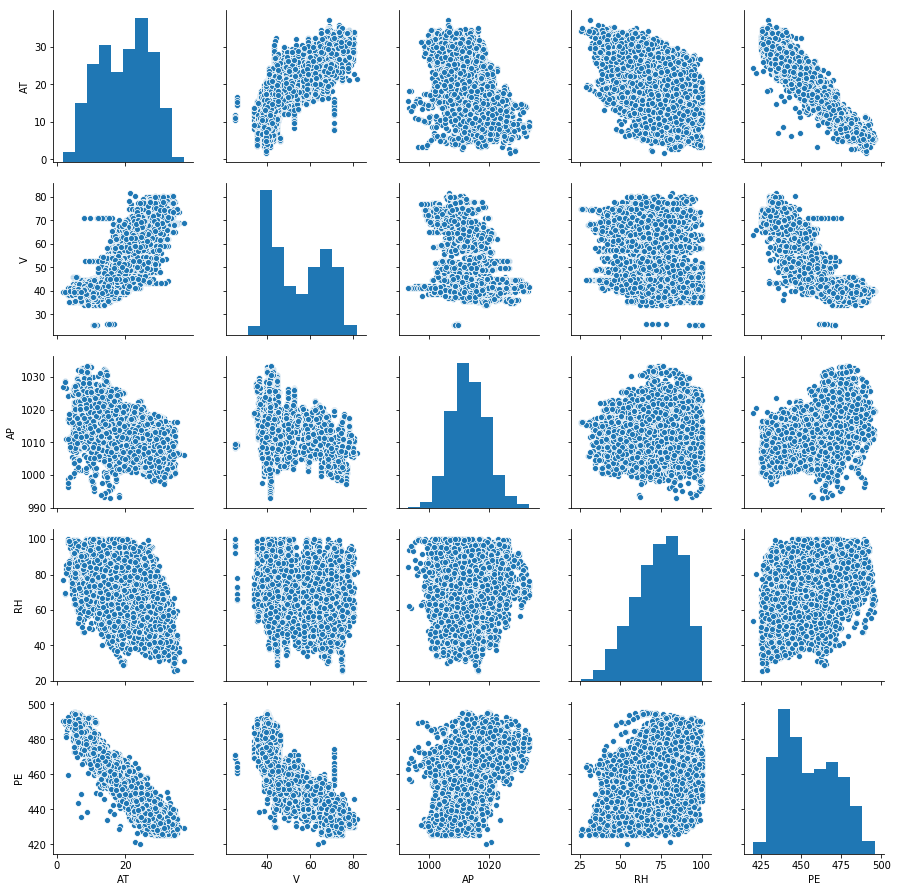

In [13]:
sbn.pairplot(data=data)

# Correlation Matrix.

In [14]:
correlation = data.corr()
print('Correlation Matrix')
correlation.style.background_gradient(cmap='coolwarm')

Correlation Matrix


,AT,V,AP,RH,PE
AT,1,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1,-0.413502,-0.312187,-0.86978
AP,-0.507549,-0.413502,1,0.0995743,0.518429
RH,-0.542535,-0.312187,0.0995743,1,0.389794
PE,-0.948128,-0.86978,0.518429,0.389794,1


# Summarize statistics of all the independent variables.

In [15]:
statistics = data.describe()
mean = statistics[1:2].values[0].tolist()
median = statistics[5:6].values[0].tolist()
minValues = statistics[3:4].values[0].tolist()
maxValues = statistics[7:8].values[0].tolist()
firstQuartile = statistics[4:5].values[0].tolist()
thirdQuartile = statistics[6:7].values[0].tolist()

# Summarize the statistics in a table
tableData = []
mean.insert(0, 'Mean')
tableData.append(mean)

median.insert(0, 'Median')
tableData.append(median)

featuresRange = []
featuresRange.append('Range')
for i in range(0, len(minValues)):
    rangeVal = maxValues[i] - minValues[i]
    featuresRange.append(rangeVal)
tableData.append(featuresRange)

firstQuartile.insert(0, 'First Quartile')
tableData.append(firstQuartile)

thirdQuartile.insert(0, 'Third Quartile')
tableData.append(thirdQuartile)

interQuartileRange = []
interQuartileRange.append('Interquartile Range')
for i in range(1, len(firstQuartile)):
    interQuartileRange.append(thirdQuartile[i]-firstQuartile[i])
tableData.append(interQuartileRange)

tableHeaders = columnNames[:]
tableHeaders.insert(0, 'Statistics')

printDatainTable(tableHeaders, tableData)

+---------------------+--------+--------+----------+--------+---------+
|     Statistics      |   AT   |   V    |    AP    |   RH   |   PE    |
+---------------------+--------+--------+----------+--------+---------+
|        Mean         | 19.651 | 54.306 | 1013.259 | 73.309 | 454.365 |
+---------------------+--------+--------+----------+--------+---------+
|       Median        | 20.345 | 52.08  | 1012.94  | 74.975 | 451.55  |
+---------------------+--------+--------+----------+--------+---------+
|        Range        |  35.3  |  56.2  |  40.41   |  74.6  |  75.5   |
+---------------------+--------+--------+----------+--------+---------+
|   First Quartile    | 13.51  | 41.74  |  1009.1  | 63.328 | 439.75  |
+---------------------+--------+--------+----------+--------+---------+
|   Third Quartile    | 25.72  | 66.54  | 1017.26  | 84.83  | 468.43  |
+---------------------+--------+--------+----------+--------+---------+
| Interquartile Range | 12.21  |  24.8  |   8.16   | 21.502 |  2

# Fit simple linear regression for each predictor.

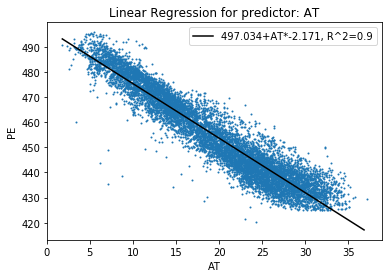

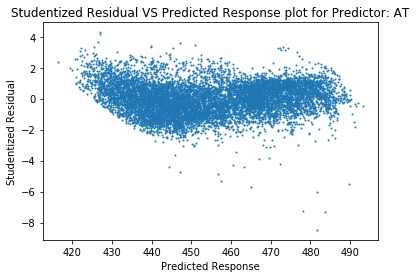

+-----------+-------------+---------+---------+------------------------+
| Predictor | Coefficient | t-value | p-value |        Comments        |
+-----------+-------------+---------+---------+------------------------+
| Constant  |   497.034   | 3177.28 |   0.0   |                        |
+-----------+-------------+---------+---------+------------------------+
|    AT     |   -2.171    | -291.72 |   0.0   | Significant predictor. |
|           |             |         |         |   Outliers present.    |
+-----------+-------------+---------+---------+------------------------+
R^2 Value with AT predictor:  0.9

R^2 Value with AT predictor after removing outliers:  0.91


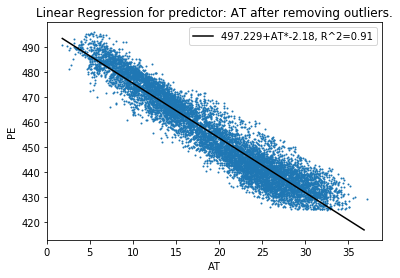

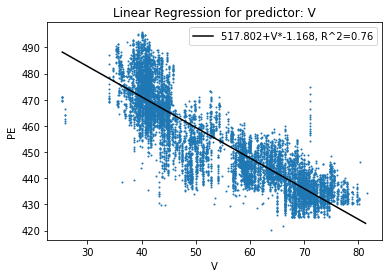

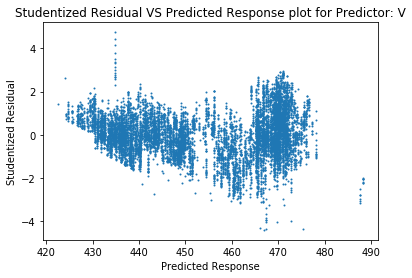

+-----------+-------------+---------+---------+------------------------+
| Predictor | Coefficient | t-value | p-value |        Comments        |
+-----------+-------------+---------+---------+------------------------+
| Constant  |   517.802   | 1370.22 |   0.0   |                        |
+-----------+-------------+---------+---------+------------------------+
|     V     |   -1.168    | -172.4  |   0.0   | Significant predictor. |
|           |             |         |         |   Outliers present.    |
+-----------+-------------+---------+---------+------------------------+
R^2 Value with V predictor:  0.76

R^2 Value with V predictor after removing outliers:  0.77


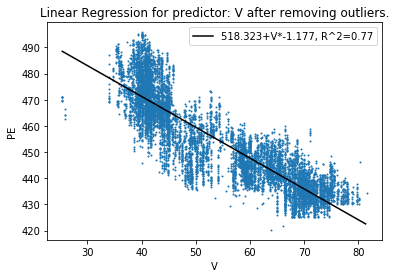

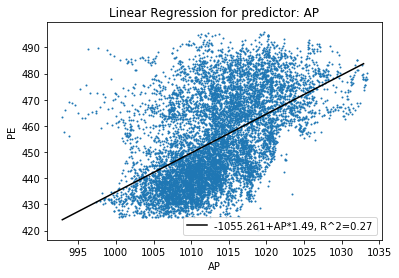

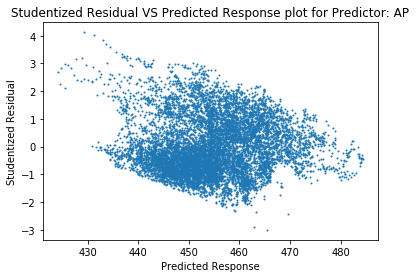

+-----------+-------------+---------+---------+------------------------+
| Predictor | Coefficient | t-value | p-value |        Comments        |
+-----------+-------------+---------+---------+------------------------+
| Constant  |  -1055.261  | -41.45  |   0.0   |                        |
+-----------+-------------+---------+---------+------------------------+
|    AP     |    1.49     |  59.3   |   0.0   | Significant predictor. |
|           |             |         |         |   Outliers present.    |
+-----------+-------------+---------+---------+------------------------+
R^2 Value with AP predictor:  0.27

R^2 Value with AP predictor after removing outliers:  0.28


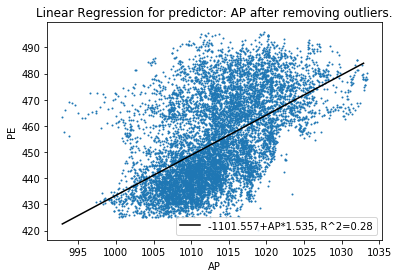

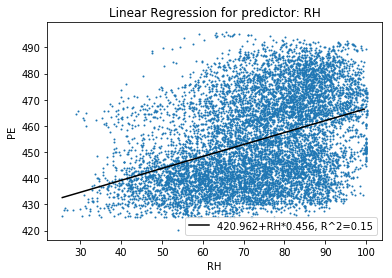

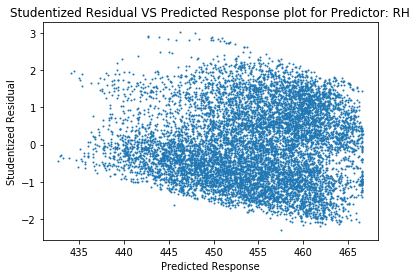

+-----------+-------------+---------+---------+------------------------+
| Predictor | Coefficient | t-value | p-value |        Comments        |
+-----------+-------------+---------+---------+------------------------+
| Constant  |   420.962   | 511.68  |   0.0   |                        |
+-----------+-------------+---------+---------+------------------------+
|    RH     |    0.456    |  41.4   |   0.0   | Significant predictor. |
|           |             |         |         |   Outliers present.    |
+-----------+-------------+---------+---------+------------------------+
R^2 Value with RH predictor:  0.15

R^2 Value with RH predictor after removing outliers:  0.15


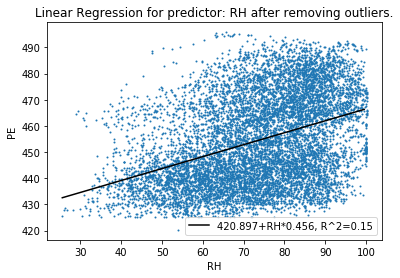

In [16]:
simpleRegressionCoefficients = {}
for i in range(0, len(featureNames)):
    predictorName = featureNames[i]
    dataX = np.array(data[predictorName])
    dataX = np.reshape(dataX, (len(dataX), 1))
    dataX = sm.add_constant(dataX)
    dataY = np.array(data[responseName])
    
    # Fit linear regression model
    coefficients, r2Value, tValues, pValues, model = LinearRegression(dataX, dataY)
        
    # store coefficient of each predictor in a dictionary
    simpleRegressionCoefficients[predictorName] = coefficients[1]
    
    # plot regression line for the predictor
    title = 'Linear Regression for predictor: ' + predictorName
    plotRegressionLine(dataX[:,1], dataY, predictorName, responseName, 
                       coefficients[1], coefficients[0], r2Value, title)
    
    # check if predictor is significantly significant
    association = ''
    if pValues[1]<=0.05:
        association = 'Significant predictor.'
    else:
        association = 'Insignificant predictor.'
    
    # compute studentized residual to detect outliers
    predictedY = coefficients[0] + coefficients[1]*dataX[:,1]
    predictedY = np.array(predictedY).flatten()
    sResidual = findStudentizedResidual(dataX[:,1], dataY, predictedY)
    
    # plot predicted response vs studentized residual scatterplot
    plt.scatter(predictedY, sResidual, s=1)
    plt.xlabel('Predicted Response')
    plt.ylabel('Studentized Residual')
    plt.title('Studentized Residual VS Predicted Response plot for Predictor: ' + predictorName)
    plt.show()
    
    newDataX = []
    newDataY = []
    # check if outliers are present
    flag = False
    for j in range(0, len(sResidual)):
        if abs(sResidual[j])>3:
            flag = True
        else:
            newDataX.append(dataX[j])
            newDataY.append(dataY[j])  
    if flag:
        outlier = 'Outliers present.'
    else:
        outlier = 'No outliers.'
    
    # add results to a table
    comments = association + '\n' + outlier
    tableData = []
    tableData.append(['Constant', coefficients[0], tValues[0], pValues[0], ''])
    tableData.append([predictorName, coefficients[1], tValues[1], pValues[1], comments])
    
    tableHeaders = ['Predictor', 'Coefficient', 't-value', 'p-value', 'Comments']  
    printDatainTable(tableHeaders, tableData)
    print('R^2 Value with', predictorName, 'predictor: ', r2Value)
    print()   
    
    # if outliers are present, remove them and fit linear regresssion model
    if flag:
        newDataX = np.array(newDataX)
        newDataY = np.array(newDataY)
        
        # Fit linear regression model
        coefficients, r2Value, tValues, pValues, model = LinearRegression(newDataX, newDataY)

        print('R^2 Value with', predictorName, 'predictor after removing outliers: ', r2Value)

        # plot regression line for the predictor
        title = 'Linear Regression for predictor: ' + predictorName + ' after removing outliers.'
        plotRegressionLine(newDataX[:,1], newDataY, predictorName, responseName, 
                           coefficients[1], coefficients[0], r2Value, title)

# Fit multiple linear regression.

In [17]:
multipleRegressionCoefficients = {}
dataX = np.array(data[featureNames])
dataX = np.reshape(dataX, (len(dataX), len(featureNames)))
dataX = sm.add_constant(dataX)
dataY = np.array(data[responseName])

# Fit mutiple regression model
coefficients, r2Value, tValues, pValues, model = LinearRegression(dataX, dataY)
  
# add results to a table
tableData = []
tableData.append(['Constant', coefficients[0], tValues[0], pValues[0], ''])
for i in range(0, len(featureNames)):
    predictorName = featureNames[i]
    multipleRegressionCoefficients[predictorName] = coefficients[i+1]
    comments = ''
    if pValues[i+1]<=0.05:
        comments = 'Significant predictor. Reject the null hypothesis.'
    else:
        comments = 'Insignificant predictor. Failed to reject the null hypothesis.'
    tableData.append([predictorName, coefficients[i+1], tValues[i+1], pValues[i+1], comments])

tableHeaders = ['Predictor', 'Coefficient', 't-value', 'p-value', 'Comments']
printDatainTable(tableHeaders, tableData)

print('R^2 Value for multiple regression: ', r2Value)

+-----------+-------------+---------+---------+----------------------------------------------------+
| Predictor | Coefficient | t-value | p-value |                      Comments                      |
+-----------+-------------+---------+---------+----------------------------------------------------+
| Constant  |   454.609   |  46.63  |   0.0   |                                                    |
+-----------+-------------+---------+---------+----------------------------------------------------+
|    AT     |   -1.978    | -129.34 |   0.0   | Significant predictor. Reject the null hypothesis. |
+-----------+-------------+---------+---------+----------------------------------------------------+
|     V     |   -0.234    | -32.12  |   0.0   | Significant predictor. Reject the null hypothesis. |
+-----------+-------------+---------+---------+----------------------------------------------------+
|    AP     |    0.062    |  6.56   |   0.0   | Significant predictor. Reject the null hypo

## Findings:
The R^2 value of linear regression model when single feature is used to predict the response is maximum 0.9 for predictor: AT.
However, when all the features are collectively used to predict the response, the R^2 value of the linear regression model increased to 0.93.

# Plot simple and multiple regression coefficients for each predictor.

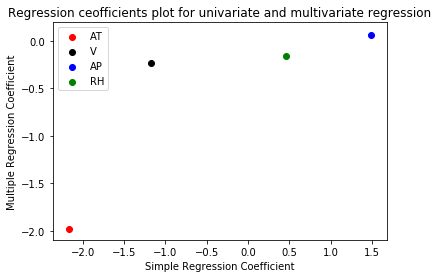

In [18]:
i = 0
color = ['red', 'black', 'blue', 'green']
for feature, simpleCoeff in simpleRegressionCoefficients.items():
    multipleCoeff = multipleRegressionCoefficients[feature]
    plt.scatter(simpleCoeff, multipleCoeff, color=color[i], label=feature)
    i += 1
plt.xlabel('Simple Regression Coefficient')
plt.ylabel('Multiple Regression Coefficient')
plt.title('Regression ceofficients plot for univariate and multivariate regression')
plt.legend()
plt.show()

# Polynomial regression for each predictor.

In [19]:
for i in range(0, len(featureNames)):
    dataX = np.array(data[featureNames[i]])
    dataX = np.reshape(dataX, (len(dataX), 1))
    polyFeatures = preprocessing.PolynomialFeatures(3, include_bias=False)
    transformedX = polyFeatures.fit_transform(dataX)
    transformedX = sm.add_constant(transformedX)
    dataY = np.array(data[responseName])
    
    # Fit linear regression model
    coefficients, r2Value, tValues, pValues, model = LinearRegression(transformedX, dataY)
    
    # add results to a table
    tableData = []
    tableData.append(['Constant', coefficients[0], tValues[0], pValues[0], ''])
    for j in range(1, 4):
        predictor = featureNames[i] + '^' + str(j)
        comments = ''
        if pValues[j]<=0.05:
            comments = 'Significant predictor.'
        else:
            comments = 'Insignificant predictor.'
        tableData.append([predictor, coefficients[j], tValues[j], pValues[j], comments])
    
    tableHeaders = ['Predictor', 'Coefficient', 't-value', 'p-value', 'Comments'] 
    print('Polynomial regression for feature:', featureNames[i])
    printDatainTable(tableHeaders, tableData)
    print('R^2 Value with', featureNames[i],'predictor:', r2Value)
    print()

Polynomial regression for feature: AT
+-----------+-------------+---------+---------+------------------------+
| Predictor | Coefficient | t-value | p-value |        Comments        |
+-----------+-------------+---------+---------+------------------------+
| Constant  |   492.728   | 732.25  |   0.0   |                        |
+-----------+-------------+---------+---------+------------------------+
|   AT^1    |    -0.61    |  -4.94  |   0.0   | Significant predictor. |
+-----------+-------------+---------+---------+------------------------+
|   AT^2    |   -0.125    |  -18.2  |   0.0   | Significant predictor. |
+-----------+-------------+---------+---------+------------------------+
|   AT^3    |    0.003    |  22.59  |   0.0   | Significant predictor. |
+-----------+-------------+---------+---------+------------------------+
R^2 Value with AT predictor: 0.91

Polynomial regression for feature: V
+-----------+-------------+---------+---------+--------------------------+
| Predictor 

# Polynomial regression with pairwise interaction terms for each predictor.

In [20]:
dataX = np.array(data[featureNames])
dataX = np.reshape(dataX, (len(dataX), len(featureNames)))
polyFeatures = preprocessing.PolynomialFeatures(2, interaction_only=True, include_bias=False)
transformedX = polyFeatures.fit_transform(dataX)
transformedX = sm.add_constant(transformedX)
dataY = np.array(data[responseName])

predictorCnt = len(transformedX[0])

# Fit linear regression model
coefficients, r2Value, tValues, pValues, model = LinearRegression(transformedX, dataY)

# add results to a table
tableData = []
idx = 1
tableData.append(['Constant', coefficients[0], tValues[0], pValues[0], ''])
for i in range(0, len(featureNames)):
    predictor = featureNames[i]
    comments = ''
    if pValues[idx]<=0.05:
        comments = 'Significant predictor.'
    else:
        comments = 'Insignificant predictor.'
    tableData.append([predictor, coefficients[idx], tValues[idx], pValues[idx], comments])
    idx += 1
    
for i in range(0, len(featureNames)):
    for j in range(i+1, len(featureNames)):
        predictor = featureNames[i] + '*' + featureNames[j]
        comments = ''
        if pValues[idx]<=0.05:
            comments = 'Significant predictor.'
        else:
            comments = 'Insignificant predictor.'
        tableData.append([predictor, coefficients[idx], tValues[idx], pValues[idx], comments])
        idx += 1

tableHeaders = ['Predictor', 'Coefficient', 't-value', 'p-value', 'Comments']
printDatainTable(tableHeaders, tableData)

print('R^2 Value:', r2Value)

+-----------+-------------+---------+---------+--------------------------+
| Predictor | Coefficient | t-value | p-value |         Comments         |
+-----------+-------------+---------+---------+--------------------------+
| Constant  |   685.782   |  8.72   |   0.0   |                          |
+-----------+-------------+---------+---------+--------------------------+
|    AT     |   -4.347    |  -1.83  |  0.07   | Insignificant predictor. |
+-----------+-------------+---------+---------+--------------------------+
|     V     |   -7.675    |  -5.68  |   0.0   |  Significant predictor.  |
+-----------+-------------+---------+---------+--------------------------+
|    AP     |   -0.152    |  -1.98  |  0.05   |  Significant predictor.  |
+-----------+-------------+---------+---------+--------------------------+
|    RH     |    1.571    |  2.03   |  0.04   |  Significant predictor.  |
+-----------+-------------+---------+---------+--------------------------+
|   AT*V    |    0.021   

# Split data into 70% training set and 30% testing set.

In [21]:
trainDataX, testDataX, trainDataY, testDataY = train_test_split(data[featureNames], data[responseName], 
                                                                train_size=0.70, test_size=0.30)
trainDataX = np.array(trainDataX)
trainDataY = np.array(trainDataY)
testDataX = np.array(testDataX)
testDataY = np.array(testDataY)

# Regression model with all quadratic features and non-linearities.

In [23]:
allFeatures = []

# Generate all quadratic and non-linear associations between features
dataFrameColumns = []
formula = responseName + ' ~ '
for feature in featureNames:
    predictor = feature + '*' + feature
    formula += 'I(' + feature + '**2) + '
    dataFrameColumns.append(feature)
    allFeatures.append(predictor)
for i in range(0, len(featureNames)):
    for j in range(i+1, len(featureNames)):
        feature1 = featureNames[i]
        feature2 = featureNames[j]
        predictor = feature1 + '*' + feature2
        if feature1 not in allFeatures:
            allFeatures.append(feature1)
        if feature2 not in allFeatures:
            allFeatures.append(feature2)
        allFeatures.append(predictor)
        formula += predictor + ' + '
formula = formula[:-2]
dataFrameColumns.append(responseName)

trainDataY = np.reshape(trainDataY, (len(trainDataY),1))
testDataY = np.reshape(testDataY, (len(testDataY),1))

trainData = np.concatenate((trainDataX, trainDataY),1)
trainData = pd.DataFrame(trainData, columns=dataFrameColumns)

# Fit linear regression model
model = sm.OLS.from_formula(formula = formula, data = trainData).fit()

# Prediction on train data and compute mean squared error
trainDataXPD = pd.DataFrame(trainDataX, columns=featureNames)
predictedY = model.predict(trainDataXPD)
model1TrainMSE = mean_squared_error(predictedY, trainDataY)
model1TrainMSE = round(model1TrainMSE, 3)
print('Train MSE:', model1TrainMSE)

# Prediction on test data and compute mean squared error
testDataXPD = pd.DataFrame(testDataX, columns=featureNames)
predictedY = model.predict(testDataXPD)
model1TestMSE = mean_squared_error(predictedY, testDataY)
model1TestMSE = round(model1TestMSE, 3)
print('Test MSE:', model1TestMSE)

Train MSE: 18.286
Test MSE: 17.723


In [24]:
coefficients = model.params
pValues = model.pvalues

# Find all significant features
significantFeatures = []
for i in range(1, len(coefficients)):
    if pValues[i]<=0.05:
        predictor = allFeatures[i-1]
        diffFeatures = predictor.split(' ')
        
        finalPredictor = ''
        for j in range(0, len(diffFeatures)):
            singleFeature = diffFeatures[j]
            featurePower = singleFeature.split('^')
            if len(featurePower)==1:
                finalPredictor += featurePower[0] + '*'
            else:
                power = featurePower[1]
                finalPredictor += featurePower[0] + '*' + featurePower[0] + '*'
        finalPredictor = finalPredictor[:-1]
        significantFeatures.append(finalPredictor)

# initial predictor if its association is significant
for i in range(0, len(featureNames)):
    for j in range(i+1, len(featureNames)):
        association1 = featureNames[i] + '*' + featureNames[j]
        association2 = featureNames[j] + '*' + featureNames[i]
        if association1 in significantFeatures or association2 in significantFeatures:
            if featureNames[i] not in significantFeatures:
                significantFeatures.append(featureNames[i])
            if featureNames[j] not in significantFeatures:
                significantFeatures.append(featureNames[j])
        
print('Significant Features:', significantFeatures)

Significant Features: ['AT*AT', 'V*V', 'AP*AP', 'RH*RH', 'V', 'AT*V', 'AP', 'RH', 'AT*RH', 'AP*RH', 'AT']


# Regression model with only significant features.

In [25]:
# Generate significant features formula
formula = responseName + ' ~ '
for feature in significantFeatures:
    formula += feature + ' + '
formula = formula[:-2]

# Fit linear regression model
model = sm.OLS.from_formula(formula = formula, data = trainData).fit()

# Prediction on train data and compute mean squared error
trainDataXPD = pd.DataFrame(trainDataX, columns=featureNames)
predictedY = model.predict(trainDataXPD)
model2TrainMSE = mean_squared_error(predictedY, trainDataY)
model2TrainMSE = round(model2TrainMSE, 3)
print('Train MSE:', model1TrainMSE)

# Prediction on test data and compute mean squared error
testDataXPD = pd.DataFrame(testDataX, columns=featureNames)
predictedY = model.predict(testDataXPD)
model2TestMSE = mean_squared_error(predictedY, testDataY)
model2TestMSE = round(model2TestMSE, 3)
print('Test MSE:', model1TestMSE)

Train MSE: 18.286
Test MSE: 17.723


# KNN Regression without normalization.

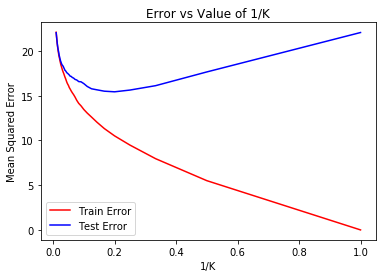

Best K: 5 with MSE: 15.436


In [26]:
# compute training error
trainErrorDict = KNNRegression(trainDataX, trainDataY, trainDataX, trainDataY)

# compute testing error
testErrorDict = KNNRegression(trainDataX, trainDataY, testDataX, testDataY)

# plot training and testing error vs 1/K
plotTrainTestError(trainErrorDict, testErrorDict, 'Train Error', 'Test Error')

# find value of K with minimum testing error
sortedTestErrorDict = sorted(testErrorDict.items(), key=operator.itemgetter(1))
bestK = int(round(1/sortedTestErrorDict[0][0]))
KNNMSE = sortedTestErrorDict[0][1]
print('Best K:', bestK, 'with MSE:', KNNMSE)

# KNN Regression with normalization.

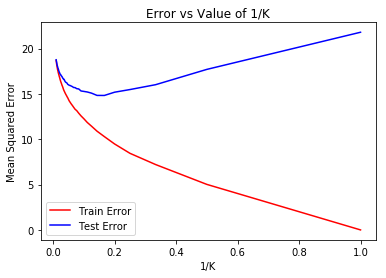

Best K: 6 with MSE: 14.825


In [27]:
# normalize data
normalizedTrainDataX, normalizedTestDataX = normalizeFeatureData(trainDataX, testDataX)

# compute training error
trainErrorDict = KNNRegression(normalizedTrainDataX, trainDataY, normalizedTrainDataX, trainDataY)

# compute testing error
testErrorDict = KNNRegression(normalizedTrainDataX, trainDataY, normalizedTestDataX, testDataY)

# plot training and testing error vs 1/K
plotTrainTestError(trainErrorDict, testErrorDict, 'Train Error', 'Test Error')

# find value of K with minimum testing error
sortedTestErrorDict = sorted(testErrorDict.items(), key=operator.itemgetter(1))
bestK = int(round(1/sortedTestErrorDict[0][0]))
normalizedKNNMSE = sortedTestErrorDict[0][1]
print('Best K:', bestK, 'with MSE:', normalizedKNNMSE)

# Comparing MSE of all the models.

In [28]:
tableData = []
row = []
row.append('Complete Regression Model')
row.append(model1TestMSE)
tableData.append(row)

row = []
row.append('Regression Model with Only Significant Features')
row.append(model2TestMSE)
tableData.append(row)

row = []
row.append('KNN Regression Without Normalization')
row.append(KNNMSE)
tableData.append(row)

row = []
row.append('KNN Regression With Normalization')
row.append(normalizedKNNMSE)
tableData.append(row)

tableHeaders = ['Model', 'Test Mean Squared Error']
printDatainTable(tableHeaders, tableData)

+-------------------------------------------------+-------------------------+
|                      Model                      | Test Mean Squared Error |
+-------------------------------------------------+-------------------------+
|            Complete Regression Model            |         17.723          |
+-------------------------------------------------+-------------------------+
| Regression Model with Only Significant Features |          18.42          |
+-------------------------------------------------+-------------------------+
|      KNN Regression Without Normalization       |         15.436          |
+-------------------------------------------------+-------------------------+
|        KNN Regression With Normalization        |         14.825          |
+-------------------------------------------------+-------------------------+


## Findings:
KNN Regression is a non-parametric approach that makes no assumption about the shape of the decision boundary. Linear Regression is a paramateric approach that fits the data by assuming a particular shape of the decision boundary.
On this dataset, the test error for both KNN Regression and Linear Regression is nearly equal. The difference between both the approaches is that KNN Regression does not tell which predictors are important. However, we can remove insignificant predictors by re-training the linear regression model.